## Importation des librairies

In [1]:
import pandas as pd
import statsmodels

## Données de l'insee chiffres d'affaires des entreprises

In [2]:
data = pd.read_csv("valeurs_mensuelles.csv", sep=";",skiprows= 2, index_col = 0, parse_dates = True)

In [3]:
data.shape

(251, 2)

## Data cleaning

In [4]:
data.head()

,Unnamed: 1,Unnamed: 2
Période,,
2019-11-01,115.90,A
2019-10-01,123.81,A
2019-09-01,114.43,A
2019-08-01,114.47,A
2019-07-01,109.02,A


In [5]:
data.tail()

,Unnamed: 1,Unnamed: 2
Période,,
1999-05-01,60.21,A
1999-04-01,63.06,A
1999-03-01,66.56,A
1999-02-01,57.36,A
1999-01-01,57.57,A


In [6]:
data = data.drop("Unnamed: 2", axis = 1)


In [7]:
data = data.rename(columns= {'Unnamed: 1':'valeur'})
data.head()

,valeur
Période,
2019-11-01,115.90
2019-10-01,123.81
2019-09-01,114.43
2019-08-01,114.47
2019-07-01,109.02


## Méthode 1 : tester la stationarité de la série avec statsmodels

In [8]:
#rendre la serie stationnaire en enlèvant la tendance
from statsmodels.tsa.tsatools import detrend
notrend = detrend(data['valeur'])
data["notrend"]= notrend

In [9]:
data.head()

,valeur,notrend
Période,,
2019-11-01,115.90,2.059811
2019-10-01,123.81,10.154529
2019-09-01,114.43,0.959246
2019-08-01,114.47,1.183963
2019-07-01,109.02,-4.081319


<AxesSubplot:xlabel='Période'>

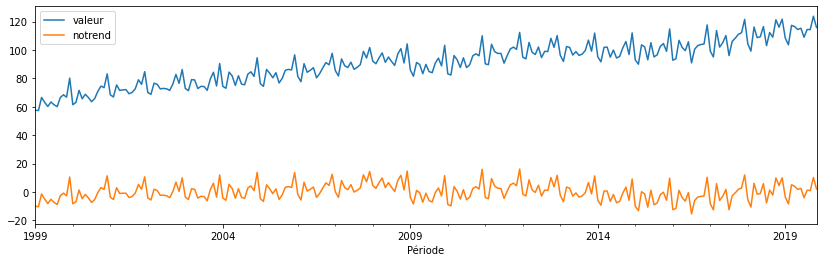

In [10]:
#visualisation de la série
import matplotlib.pyplot as plt
data.plot(y= ["valeur", "notrend"], figsize = (14,4))

In [11]:
#utiliser seasonal_decompose pour analyser la serie temporelle et decomposer la tendance la saisonalité et le résidu
from statsmodels.tsa.seasonal import seasonal_decompose
data_decompose = seasonal_decompose(data['valeur'])
print(data_decompose.trend)
print(data_decompose.seasonal)
print(data_decompose.resid)
print(data_decompose.observed)

Période
2019-11-01   NaN
2019-10-01   NaN
2019-09-01   NaN
2019-08-01   NaN
2019-07-01   NaN
              ..
1999-05-01   NaN
1999-04-01   NaN
1999-03-01   NaN
1999-02-01   NaN
1999-01-01   NaN
Name: trend, Length: 251, dtype: float64
Période
2019-11-01    0.555686
2019-10-01    4.925019
2019-09-01    0.758228
2019-08-01   -3.405835
2019-07-01   -5.494897
                ...   
1999-05-01   -2.690272
1999-04-01    0.472436
1999-03-01    4.038665
1999-02-01   -7.282689
1999-01-01   -4.770210
Name: seasonal, Length: 251, dtype: float64
Période
2019-11-01   NaN
2019-10-01   NaN
2019-09-01   NaN
2019-08-01   NaN
2019-07-01   NaN
              ..
1999-05-01   NaN
1999-04-01   NaN
1999-03-01   NaN
1999-02-01   NaN
1999-01-01   NaN
Name: resid, Length: 251, dtype: float64
Période
2019-11-01    115.90
2019-10-01    123.81
2019-09-01    114.43
2019-08-01    114.47
2019-07-01    109.02
               ...  
1999-05-01     60.21
1999-04-01     63.06
1999-03-01     66.56
1999-02-01     57.36
1999-

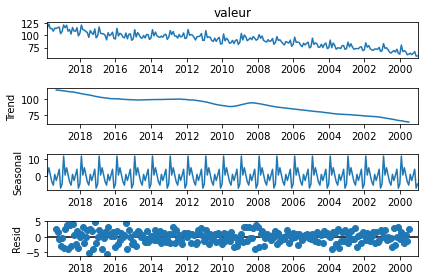

In [12]:
data_decompose.plot()
plt.show()

In [13]:
data['trend']= data_decompose.trend
data['seasonal'] = data_decompose.seasonal
data['resid'] = data_decompose.resid

data.head(10)

,valeur,notrend,trend,seasonal,resid
Période,,,,,
2019-11-01,115.90,2.059811,NaN,0.555686,NaN
2019-10-01,123.81,10.154529,NaN,4.925019,NaN
2019-09-01,114.43,0.959246,NaN,0.758228,NaN
2019-08-01,114.47,1.183963,NaN,-3.405835,NaN
2019-07-01,109.02,-4.081319,NaN,-5.494897,NaN
2019-06-01,115.40,2.483398,NaN,0.980536,NaN
2019-05-01,114.46,1.728115,114.611667,-2.690272,2.538606
2019-04-01,116.49,3.942833,114.515000,0.472436,1.502564
2019-03-01,117.39,5.027550,114.186250,4.038665,-0.834915


In [14]:
#test de dickeyfuller
from statsmodels.tsa.stattools import adfuller
X = data.notrend
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.466618
p-value: 0.008887
Critical Values:
	1%: -3.458
	5%: -2.874
	10%: -2.573


## Méthode 2 faire les transformations à la main pour obtenir une série stationnaire

In [15]:
# récup les données
data2 =  pd.read_csv("valeurs_mensuelles.csv", sep=";",skiprows= 2, index_col = 0, parse_dates = True)
data2 = data2.drop("Unnamed: 2", axis = 1)
data2 = data2.rename(columns= {'Unnamed: 1':'valeur'})
data2.head()


,valeur
Période,
2019-11-01,115.90
2019-10-01,123.81
2019-09-01,114.43
2019-08-01,114.47
2019-07-01,109.02


In [16]:
#difference première à la main
data2['diff première']=data2.diff(axis = 0, periods = 1) 
#difference second

data2.head()

,valeur,diff première
Période,,
2019-11-01,115.90,NaN
2019-10-01,123.81,7.91
2019-09-01,114.43,-9.38
2019-08-01,114.47,0.04
2019-07-01,109.02,-5.45


In [17]:
data2['diff second'] = data2['diff première'].diff(1)
data2.dropna(inplace = True)
data2.head()

,valeur,diff première,diff second
Période,,,
2019-09-01,114.43,-9.38,-17.29
2019-08-01,114.47,0.04,9.42
2019-07-01,109.02,-5.45,-5.49
2019-06-01,115.40,6.38,11.83
2019-05-01,114.46,-0.94,-7.32


In [18]:
data2['diff 12'] = data2['valeur'].diff(12)
data2.dropna(inplace = True)
data2.head()

,valeur,diff première,diff second,diff 12
Période,,,,
2018-09-01,109.06,-12.23,-17.42,-5.37
2018-08-01,112.33,3.27,15.50,-2.14
2018-07-01,103.07,-9.26,-12.53,-5.95
2018-06-01,116.51,13.44,22.70,1.11
2018-05-01,109.31,-7.20,-20.64,-5.15


In [19]:
(data2.iloc[0])

valeur           109.06
diff première    -12.23
diff second      -17.42
diff 12           -5.37
Name: 2018-09-01 00:00:00, dtype: float64

In [20]:
import numpy as np
data2['diff12_1'] = data2['diff 12'].diff(1)
data2.dropna(inplace = True)
data2['date']= np.arange(len(data2.index))
data2.head()


,valeur,diff première,diff second,diff 12,diff12_1,date
Période,,,,,,
2018-08-01,112.33,3.27,15.50,-2.14,3.23,0
2018-07-01,103.07,-9.26,-12.53,-5.95,-3.81,1
2018-06-01,116.51,13.44,22.70,1.11,7.06,2
2018-05-01,109.31,-7.20,-20.64,-5.15,-6.26,3
2018-04-01,108.75,-0.56,6.64,-7.74,-2.59,4


<AxesSubplot:xlabel='Période'>

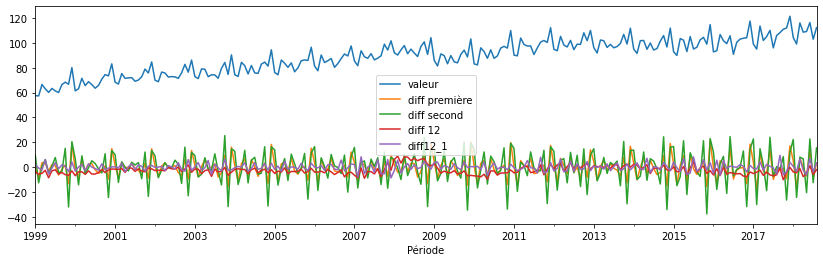

In [23]:
data2.plot(y=['valeur', 'diff première', 'diff second', 'diff 12', 'diff12_1'], figsize=(14,4)) 

In [24]:
#test de dickeyfuller
from statsmodels.tsa.stattools import adfuller
data2 = data2.dropna()
data2.head()
X = data2['diff première']
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.906771
p-value: 0.044566
Critical Values:
	1%: -3.460
	5%: -2.875
	10%: -2.574


In [25]:
#test dickey fuller diff second
from statsmodels.tsa.stattools import adfuller
data2 = data2.dropna()
data2.head()
Z = data2['diff second']
result = adfuller(Z)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -19.650979
p-value: 0.000000
Critical Values:
	1%: -3.460
	5%: -2.875
	10%: -2.574


In [26]:
#tesdickey fuller diff 12
from statsmodels.tsa.stattools import adfuller
data2 = data2.dropna()
data2.head()
T = data2['diff 12']
result = adfuller(T)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.800554
p-value: 0.002902
Critical Values:
	1%: -3.460
	5%: -2.875
	10%: -2.574


In [27]:
#tesdickey fuller diff 12 et 1
from statsmodels.tsa.stattools import adfuller
data2 = data2.dropna()
data2.head()
R = data2['diff12_1']
result = adfuller(R)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -5.475371
p-value: 0.000002
Critical Values:
	1%: -3.460
	5%: -2.875
	10%: -2.574


## Tracer les autocorelations et les autocorelations partielles

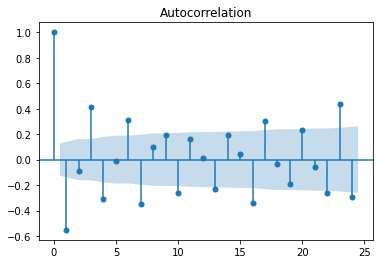

In [28]:
#trace les autocorelations
from statsmodels.graphics.tsaplots import plot_acf
from matplotlib import pyplot
plot_acf(R)
pyplot.show()


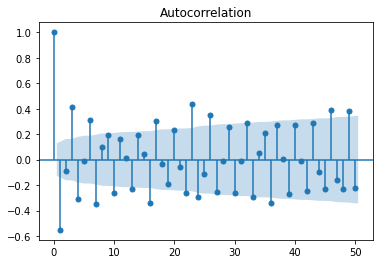

In [29]:
#envie de zommer sur quelques valeurs
plot_acf(R, lags = 50)
pyplot.show()

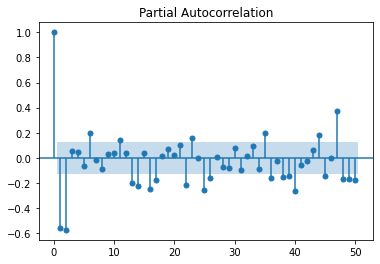

In [30]:
#trace les autocorelations partielles
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(R, lags=50)
pyplot.show()

## Modèle ARMA

In [31]:
from statsmodels.tsa.arima_model import ARMA
model = ARMA(data2.diff12_1,(3,0))
train = model.fit()
print(train.summary())

print(train.resid)

C:\Users\TURBULANCE\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\TURBULANCE\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequ

                              ARMA Model Results                              
Dep. Variable:               diff12_1   No. Observations:                  236
Model:                     ARMA(3, 0)   Log Likelihood                -531.151
Method:                       css-mle   S.D. of innovations              2.292
Date:                Wed, 16 Feb 2022   AIC                           1072.301
Time:                        00:05:13   BIC                           1089.620
Sample:                             0   HQIC                          1079.283
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0016      0.065     -0.024      0.981      -0.130       0.127
ar.L1.diff12_1    -0.8308      0.065    -12.720      0.000      -0.959      -0.703
ar.L2.diff12_1    -0.5144      0.078

In [32]:
residus = train.resid

In [33]:
#imprimer le summary
#Tester les résidus si ils sont stationnaires
#si modèle bon on doit fitter 